In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
images = 'C:/Users/Sam/Downloads/greendino/greendino/0_startingimages/'
depth = 'C:/Users/Sam/Downloads/greendino/greendino/1_leresdepthmaps/'
targets = 'datasets/greendino/images/'

In [3]:
i=10
img = cv2.imread(images+os.listdir(images)[i])
dpt = cv2.imread(depth+os.listdir(depth)[i], cv2.IMREAD_GRAYSCALE)

In [4]:
dpt.min(), dpt.max()

(0, 255)

In [5]:
dpt.shape

(1264, 1264)

115.0


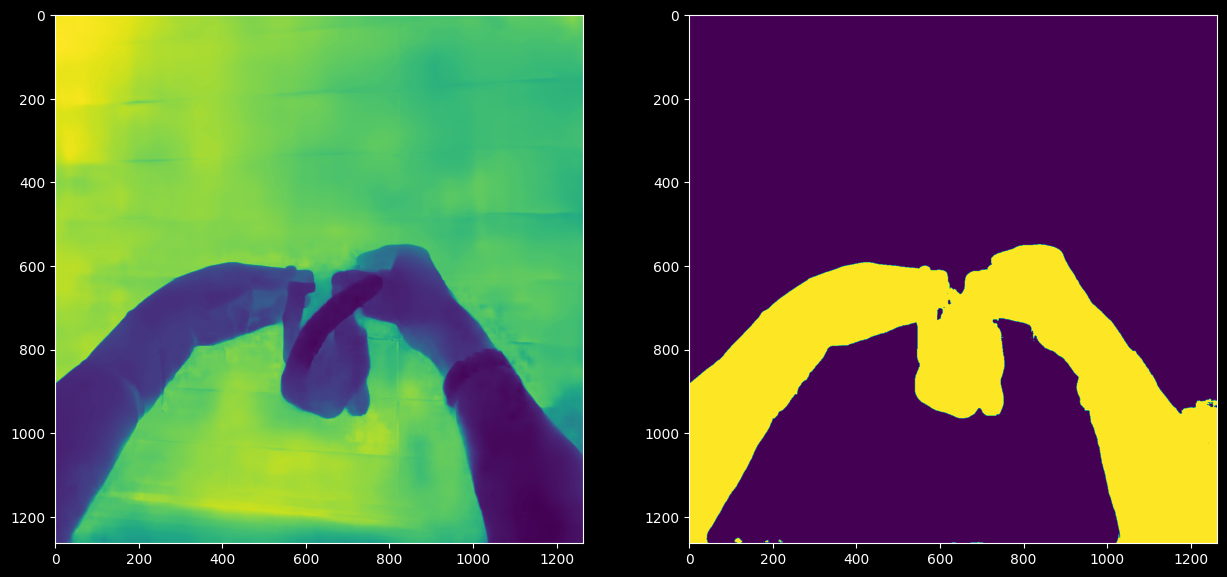

In [6]:
T, _ = cv2.threshold(dpt, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(dpt)
plt.subplot(1,2,2)
plt.imshow(dpt<T+25)

In [7]:
(dpt<(T+25)).shape

(1264, 1264)

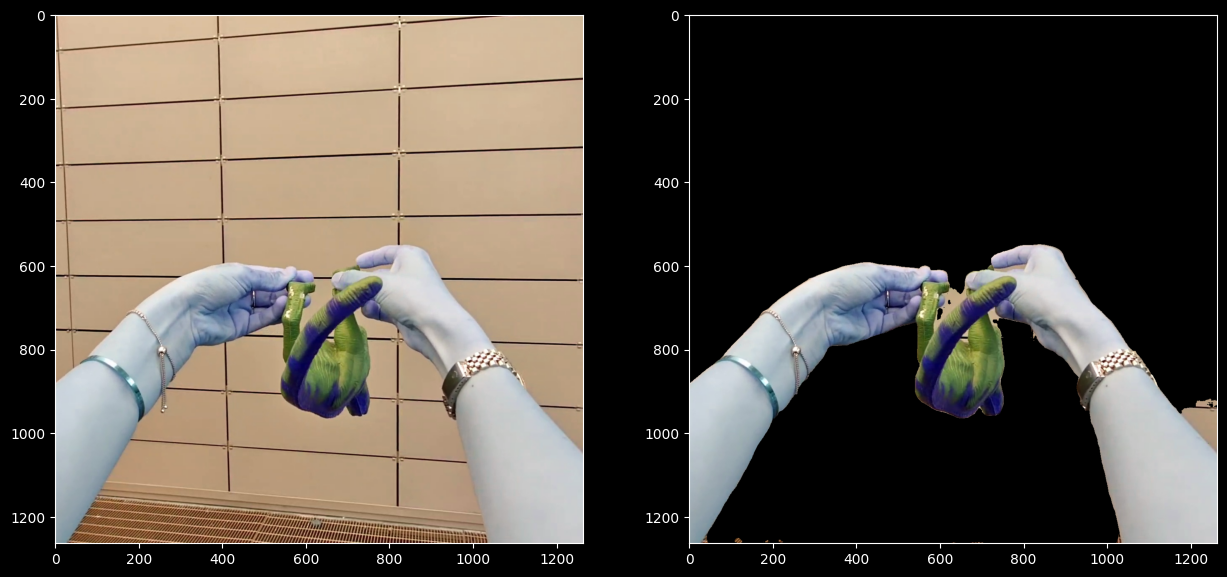

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img*(dpt<(T+25))[...,None])

In [9]:
C=0

for image in os.listdir(targets):
    
    img = cv2.imread(images+image)
    dpt = cv2.imread(depth+image.replace('.jpg','.png'), cv2.IMREAD_GRAYSCALE)

    T, _ = cv2.threshold(dpt, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    img = img * (dpt<(T+25))[...,None]
    cv2.imwrite(targets+image, img)
